In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [7]:
import plotly.express as px

In [11]:
missing_value = 100 * df.isnull().sum() / len(df)
missing_value = missing_value.reset_index()
missing_value.columns = ['variables', 'percentage_of_missing_values']
missing_value = missing_value.sort_values('percentage_of_missing_values', ascending=False)
missing_value

fig = px.bar(missing_value, y='percentage_of_missing_values',x='variables',title='Missing values % in each column',
             template='ggplot2',text='percentage_of_missing_values');
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


fig.show()

In [12]:
df['bmi'].isnull().sum()

201

In [13]:
gender_counts = df['gender'].value_counts()
gender_counts

,count
gender,
Female,2992
Male,2111
Other,1


In [14]:
df.describe(exclude = ['float', 'int64'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5104,5104,5104,5104,5104
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2992,3348,2920,2594,1892


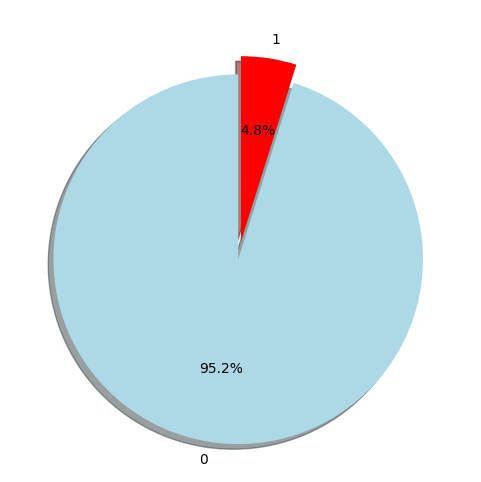

In [16]:
labels = df['stroke'].value_counts().index
sizes = df['stroke'].value_counts().values

colors = ['lightblue', 'red']
explode = [0.1, 0]

plt.figure(figsize = (6, 6))
plt.pie(sizes, labels = labels, explode = explode, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)

plt.show()

In [17]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


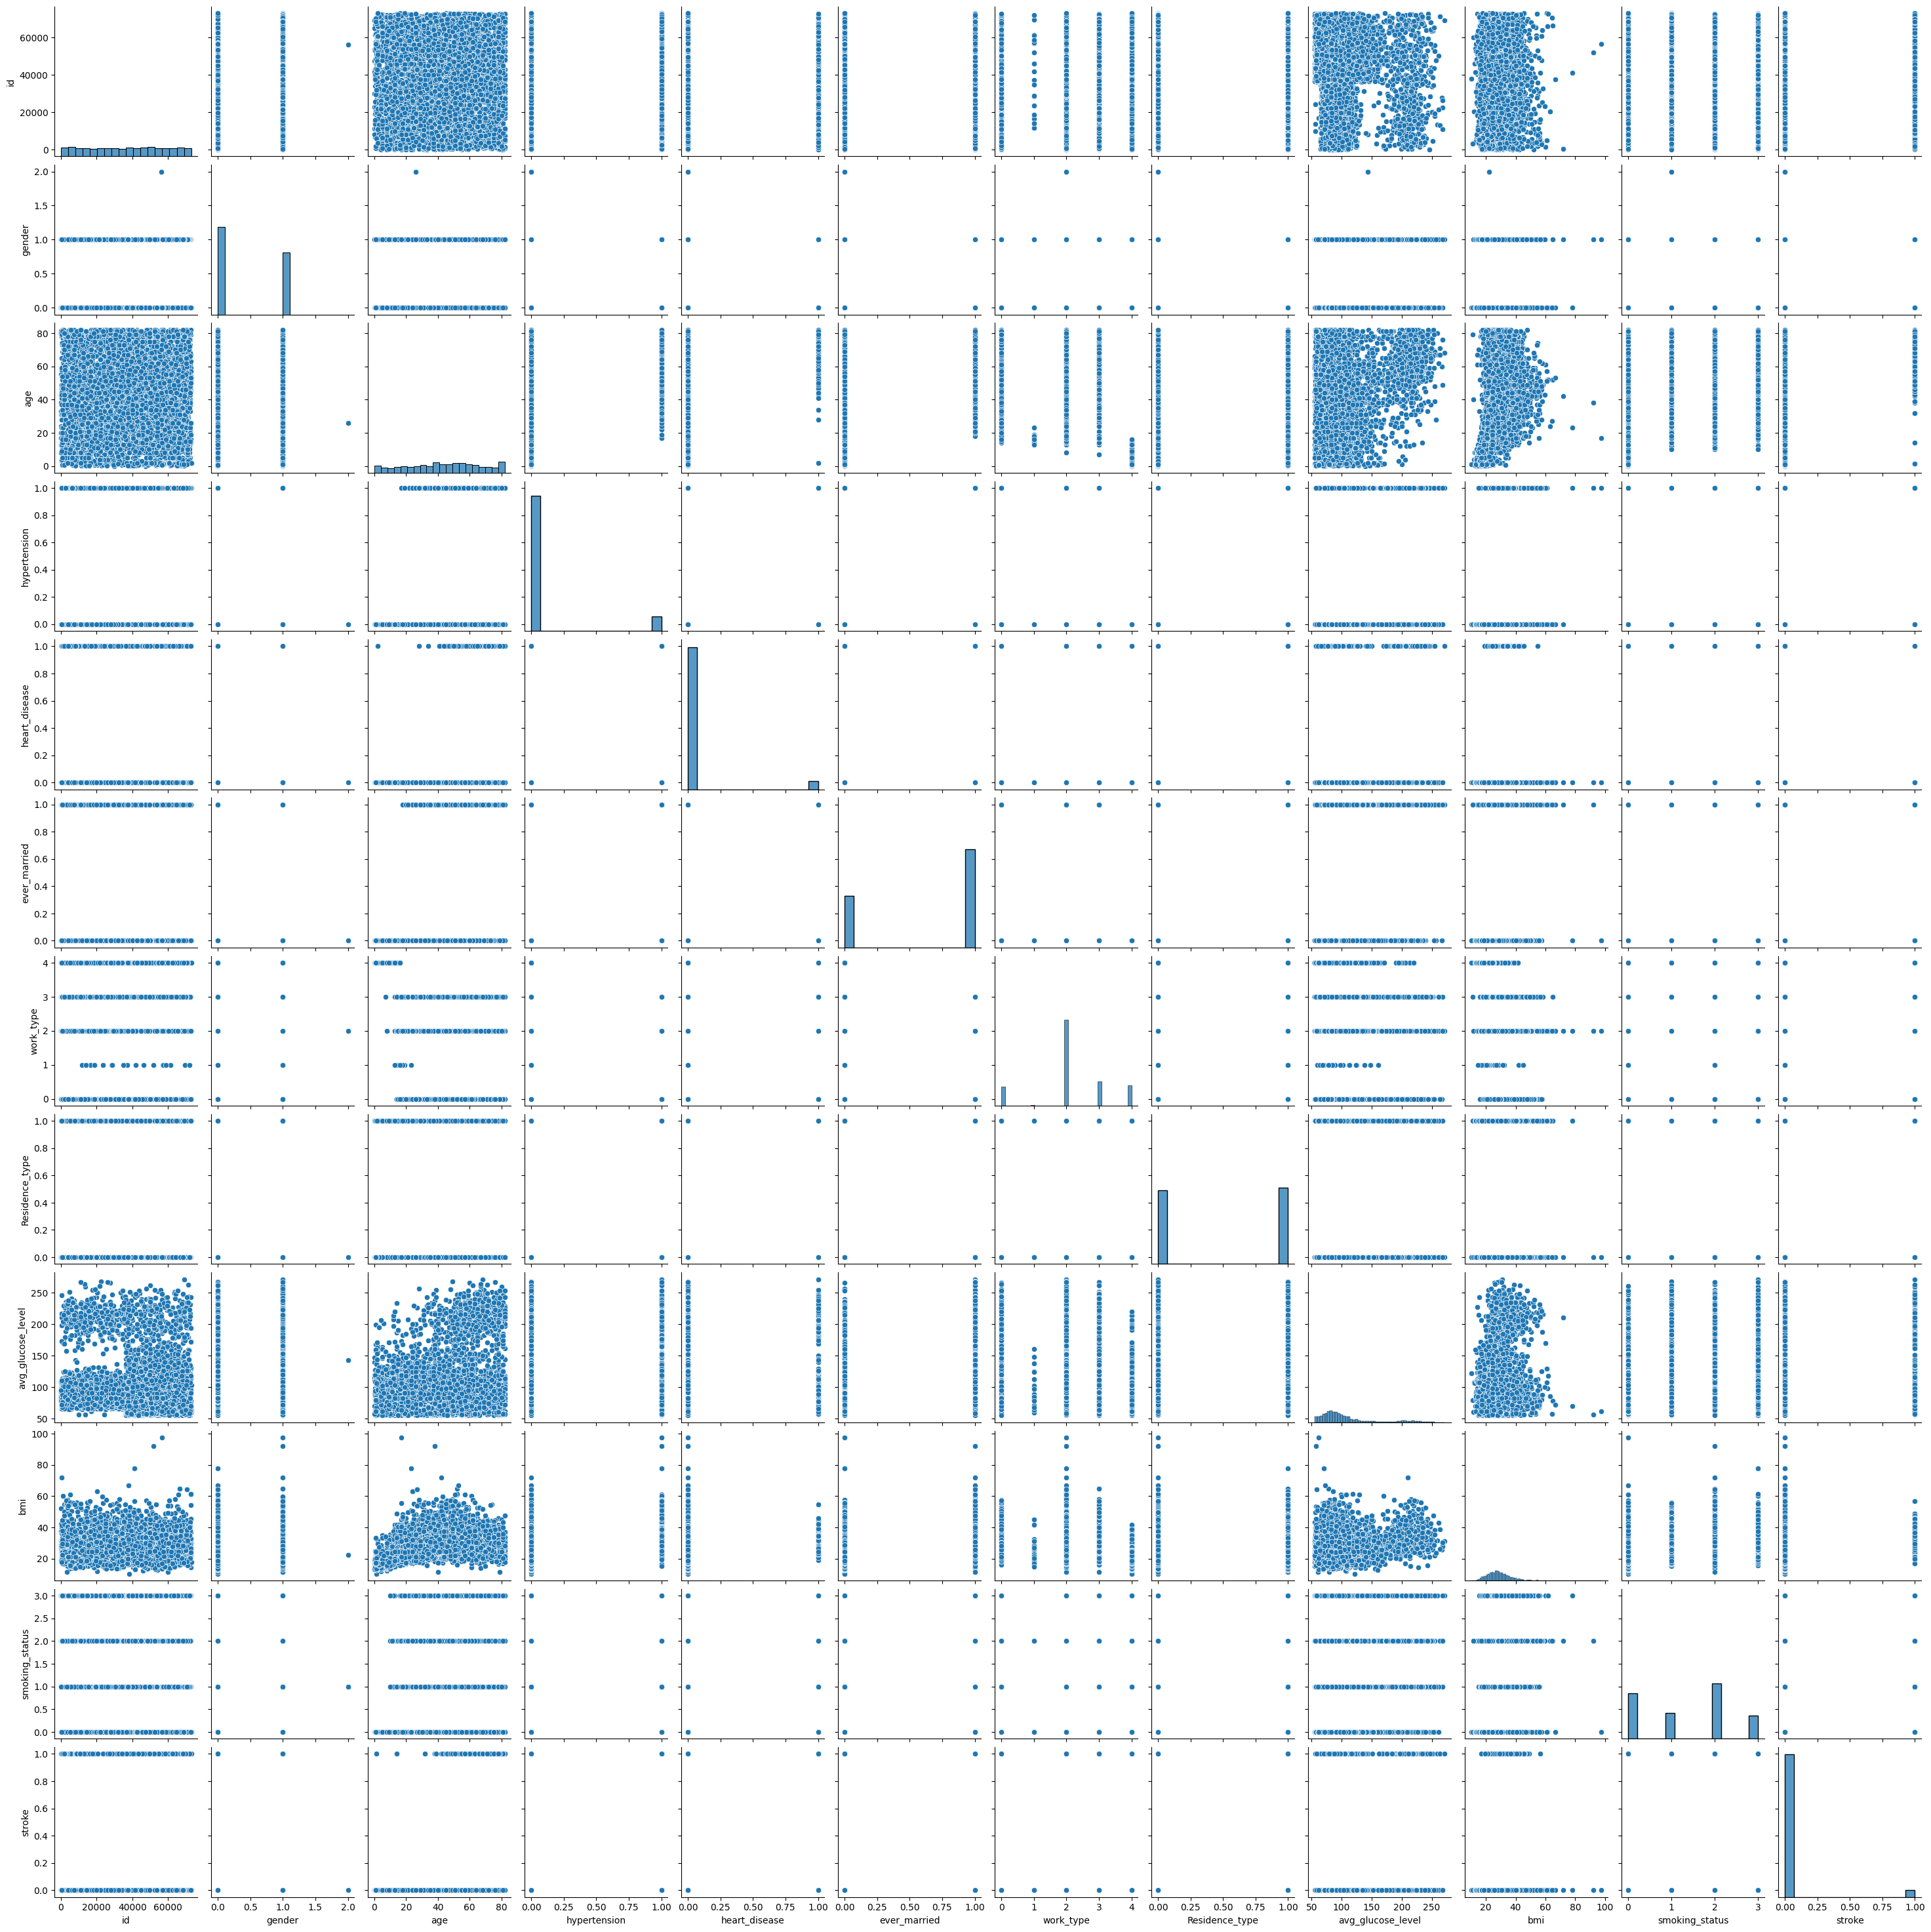

In [18]:
sns.pairplot(df)

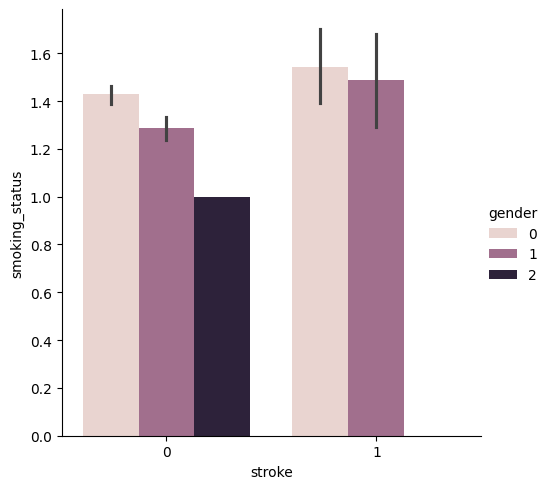

In [20]:
sns.catplot(y = 'smoking_status', x = 'stroke', data = df, kind = 'bar', hue='gender')
plt.show()